In [1]:
import evadb

In [2]:
# Connect to EvaDB and get a database cursor for running queries
cursor = evadb.connect().cursor()

# List all the built-in functions in EvaDB
print(cursor.query("SHOW FUNCTIONS;").df())

                     name                                             inputs  \
0    MnistImageClassifier                 [data NDARRAY ANYTYPE (3, 28, 28)]   
1  FastRCNNObjectDetector        [Frame_Array NDARRAY UINT8 (3, None, None)]   
2              ArrayCount   [Input_Array NDARRAY ANYTYPE (), Search_Key ANY]   
3                    Crop  [Frame_Array NDARRAY UINT8 (3, None, None), bb...   
4                 ChatGPT  [query NDARRAY STR (1,), content NDARRAY STR (...   
5         StableDiffusion                       [prompt NDARRAY STR (None,)]   
6                   DallE                       [prompt NDARRAY STR (None,)]   
7                    Open                                    [img_path TEXT]   
8              Similarity  [Frame_Array_Open NDARRAY UINT8 (3, None, None...   
9                    Yolo             [data NDARRAY FLOAT32 (None, None, 3)]   

                                             outputs             type  \
0                                       [label

In [3]:
!wget -nc "https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4"

--2023-12-19 23:47:24--  https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4
Resolving www.dropbox.com (www.dropbox.com)... 162.125.83.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.83.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yxljxz6zxoqu54v/mnist.mp4 [following]
--2023-12-19 23:47:24--  https://www.dropbox.com/s/raw/yxljxz6zxoqu54v/mnist.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc03395b2197e9f1d3301140e712.dl.dropboxusercontent.com/cd/0/inline/CJuhJXEwOIeB5wNhuBpH1hl2InvvN_NRoVxOOTA_BdjLo2kGidoIMBntZkabNukxcxCAT-5xDqQ4yo1ethUpuI36ovcvtaS8bDx5eKL6x5TpoJ_fQKlqhaODdhWK1_ncm9kbOHDOWqfkSlR97G8V6BNw/file# [following]
--2023-12-19 23:47:25--  https://uc03395b2197e9f1d3301140e712.dl.dropboxusercontent.com/cd/0/inline/CJuhJXEwOIeB5wNhuBpH1hl2InvvN_NRoVxOOTA_BdjLo2kGidoIMBntZkabNukxcxCAT-5xDqQ4yo1ethUpuI36ovcvtaS8bDx5eKL6x5TpoJ_fQKlqhaODdhWK1_ncm9kbOHDOW

In [5]:
cursor.query("DROP TABLE IF EXISTS MNISTVid").df()
cursor.query("LOAD VIDEO 'mnist.mp4' INTO MNISTVid").df()

,0
0,Number of loaded VIDEO: 1


In [6]:
query = cursor.query("""
 SELECT data, MnistImageClassifier(data).label
    FROM MNISTVid
    WHERE id = 30 OR id = 50 OR id = 70 OR id = 0 OR id = 140
""")

response = query.df()

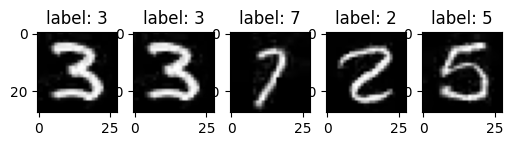

In [7]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=[6,8])

for axi in ax.flat:
    idx = np.random.randint(len(response))
    img = response['data'].iloc[idx]
    label = response['label'].iloc[idx]
    axi.imshow(img)

    axi.set_title(f'label: {label}')

plt.show()